In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import math
import sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head(20)

age     sex    bmi  children smoker     region      charges
0    19  female  27.90         0    yes  southwest  16884.92400
1    18    male  33.77         1     no  southeast   1725.55230
2    28    male  33.00         3     no  southeast   4449.46200
3    33    male  22.71         0     no  northwest  21984.47061
4    32    male  28.88         0     no  northwest   3866.85520
5    31  female  25.74         0     no  southeast   3756.62160
6    46  female  33.44         1     no  southeast   8240.58960
7    37  female  27.74         3     no  northwest   7281.50560
8    37    male  29.83         2     no  northeast   6406.41070
9    60  female  25.84         0     no  northwest  28923.13692
10   25    male  26.22         0     no  northeast   2721.32080
11   62  female  26.29         0    yes  southeast  27808.72510
12   23    male  34.40         0     no  southwest   1826.84300
13   56  female  39.82         0     no  southeast  11090.71780
14   27    male  42.13         0    yes  southeast  39611.75770
15   19    male  24.60         1     no  southwest   1837.23700
16   52  female  30.78         1     no  northeast  10797.33620
17   23    male  23.85         0     no  northeast   2395.17155
18   56    male  40.30         0     no  southwest  10602.38500
19   30    male  35.30         0    yes  southwest  36837.46700

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
corr_df= df[['age', 'children', 'bmi','charges']].corr()
corr_df

age  children       bmi   charges
age       1.000000  0.042469  0.109277  0.299008
children  0.042469  1.000000  0.012766  0.067998
bmi       0.109277  0.012766  1.000000  0.198337
charges   0.299008  0.067998  0.198337  1.000000

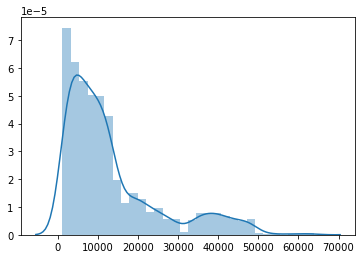

In [7]:
c = df['charges'].values
sns.distplot(c)

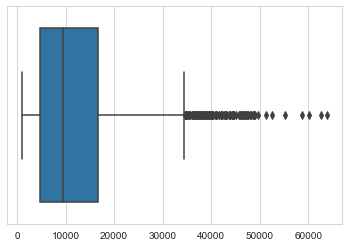

In [8]:
# should I have eliminated outliers for the entire data set instead of for just the non-smoking group
sns.set_style('whitegrid')
nx = df['charges'].values
ax = sns.boxplot(nx)

In [9]:
dfmask = df['charges']<32000

In [10]:
out_test = df[dfmask]
out_test

age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
1      18    male  33.77         1     no  southeast   1725.55230
2      28    male  33.00         3     no  southeast   4449.46200
3      33    male  22.71         0     no  northwest  21984.47061
4      32    male  28.88         0     no  northwest   3866.85520
...   ...     ...    ...       ...    ...        ...          ...
1333   50    male  30.97         3     no  northwest  10600.54830
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[1183 rows x 7 columns]

In [11]:
# majority of outlier activity appears to me from smoking. See smoker count below
out_test['smoker'].value_counts()

no     1059
yes     124
Name: smoker, dtype: int64

In [12]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
total_charges = df['charges'].sum()
total_charges

17755824.990759

In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [196]:
#df.groupby('Item_Type').agg(np.sum)[['Item_Outlet_Sales']].round(2)
df.groupby(['sex','smoker']).agg(np.sum)[['charges']].round(2)

charges
sex    smoker            
female no      4792976.62
       yes     3528084.57
male   no      4181084.85
       yes     5253678.95

In [197]:
#df.groupby('Item_Type').agg(np.sum)[['Item_Outlet_Sales']].round(2)
df.groupby(['sex','smoker']).agg(np.median)[['charges']].round(2)

charges
sex    smoker          
female no       7639.42
       yes     28950.47
male   no       6985.51
       yes     36085.22

In [17]:
#df.groupby('Item_Type').agg(np.sum)[['Item_Outlet_Sales']].round(2)
df.groupby(['sex','smoker']).agg(np.mean)[['charges']].round(2)

charges
sex    smoker          
female no       8762.30
       yes     30679.00
male   no       8087.20
       yes     33042.01

In [166]:
df.groupby(['sex','smoker','region']).agg(np.max)[['charges']].round(2)

charges
sex    smoker region             
female no     northeast  31620.00
              northwest  33471.97
              southeast  36580.28
              southwest  36910.61
       yes    northeast  58571.07
              northwest  55135.40
              southeast  63770.43
              southwest  48824.45
male   no     northeast  32108.66
              northwest  30284.64
              southeast  27724.29
              southwest  27941.29
       yes    northeast  48549.18
              northwest  60021.40
              southeast  62592.87
              southwest  52590.83

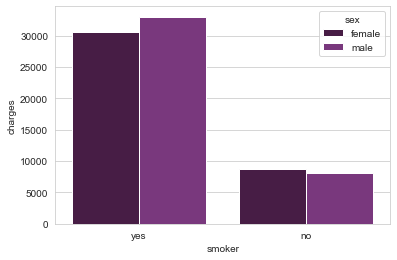

In [18]:
sns.barplot(x=df['smoker'], y=df['charges'], data=df, hue='sex', ci=False, palette=(['#4E164B','#832D88']))

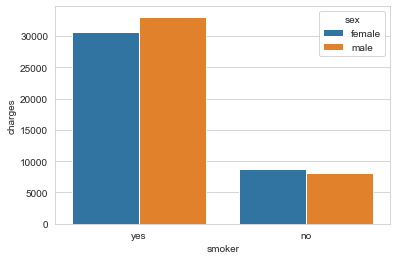

In [19]:
sns.barplot(x=df['smoker'], y=df['charges'], data=df, hue='sex', ci=False)

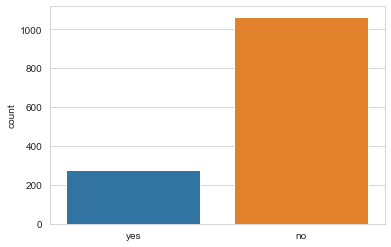

In [20]:
sv = df['smoker'].values
sns.countplot(sv)

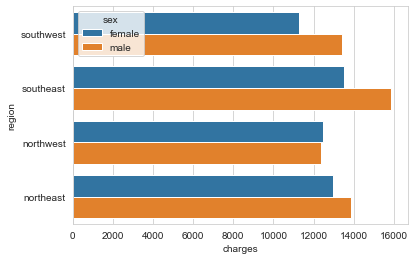

In [21]:
ax = sns.barplot(x='charges', y='region', data=df,hue='sex', ci=False)

In [192]:
ax = sns.barplot(x='charges', y='region', palette = ['#A2BFDB','#4E164B'], data=df,hue='smoker', ci=False)

In [23]:
ax =sns.scatterplot(x = 'age' , y = 'charges', data = df, hue = 'smoker', sizes = (50, 200))

In [24]:
#what are these two different groups of smokers and non-smokers around between 10,000 and 30.000??
ten = df['charges']> 10000
thr = df['charges']<30000

bimod = df[ten & thr]


In [25]:
bimod

age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
3      33    male  22.71         0     no  northwest  21984.47061
9      60  female  25.84         0     no  northwest  28923.13692
11     62  female  26.29         0    yes  southeast  27808.72510
13     56  female  39.82         0     no  southeast  11090.71780
...   ...     ...    ...       ...    ...        ...          ...
1330   57  female  25.74         2     no  southeast  12629.16560
1331   23  female  33.40         0     no  southwest  10795.93733
1332   52  female  44.70         3     no  southwest  11411.68500
1333   50    male  30.97         3     no  northwest  10600.54830
1337   61  female  29.07         0    yes  northwest  29141.36030

[464 rows x 7 columns]

In [26]:
bimod.describe()

age         bmi    children       charges
count  464.00000  464.000000  464.000000    464.000000
mean    48.18319   29.822974    1.099138  16045.137926
std     13.73440    5.812941    1.273962   5278.795117
min     18.00000   17.200000    0.000000  10043.249000
25%     39.75000   25.460000    0.000000  11813.705625
50%     53.00000   28.880000    1.000000  13903.895700
75%     58.00000   33.540000    2.000000  19684.925472
max     64.00000   49.060000    5.000000  29523.165600

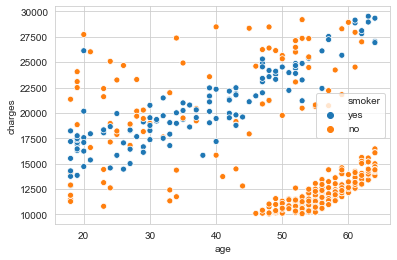

In [27]:
ax =sns.scatterplot(x = 'age' , y = 'charges', data = bimod, hue = 'smoker', sizes = (50, 200))

In [28]:
bimod['region'].value_counts()

northeast    128
northwest    120
southeast    110
southwest    106
Name: region, dtype: int64

In [29]:
a = bimod['age']>45
b = bimod['smoker']=='no'
c = bimod['charges']<16000

In [30]:
anomoly = bimod[a & b & c]

In [31]:
# I can't really say what, if anything, is happening here
anomoly

age     sex    bmi  children smoker     region      charges
13     56  female  39.82         0     no  southeast  11090.71780
16     52  female  30.78         1     no  northeast  10797.33620
18     56    male  40.30         0     no  southwest  10602.38500
20     60  female  36.01         0     no  northeast  13228.84695
25     59  female  27.72         3     no  southeast  14001.13380
...   ...     ...    ...       ...    ...        ...          ...
1325   61    male  33.54         0     no  northeast  13143.33665
1329   52    male  38.60         2     no  southwest  10325.20600
1330   57  female  25.74         2     no  southeast  12629.16560
1332   52  female  44.70         3     no  southwest  11411.68500
1333   50    male  30.97         3     no  northwest  10600.54830

[251 rows x 7 columns]

In [32]:
anomoly.describe()

age         bmi    children       charges
count  251.000000  251.000000  251.000000    251.000000
mean    56.952191   31.543944    1.055777  12160.443111
std      4.272436    5.809600    1.325472   1356.490002
min     46.000000   18.340000    0.000000  10043.249000
25%     54.000000   27.500000    0.000000  11071.855500
50%     57.000000   31.790000    0.000000  11945.132700
75%     60.000000   35.810000    2.000000  13143.600750
max     64.000000   49.060000    5.000000  15612.193350

In [33]:
anomoly['region'].value_counts()

northwest    68
southwest    67
northeast    65
southeast    51
Name: region, dtype: int64

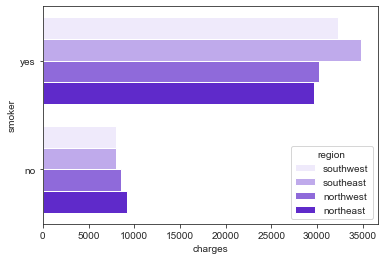

In [34]:
sns.set_style('ticks')
ax = sns.barplot(x = 'charges', y = 'smoker', hue = 'region', color = '#560FE5', data = df, orient = 'h', ci = False)

In [35]:
mask_nonsmokers = df['smoker']=='no'

In [36]:
non_smokers = df[mask_nonsmokers]

In [37]:
non_smokers

age     sex    bmi  children smoker     region      charges
1      18    male  33.77         1     no  southeast   1725.55230
2      28    male  33.00         3     no  southeast   4449.46200
3      33    male  22.71         0     no  northwest  21984.47061
4      32    male  28.88         0     no  northwest   3866.85520
5      31  female  25.74         0     no  southeast   3756.62160
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1333   50    male  30.97         3     no  northwest  10600.54830
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[1064 rows x 7 columns]

In [38]:
non_smokers.describe()

age          bmi     children       charges
count  1064.000000  1064.000000  1064.000000   1064.000000
mean     39.385338    30.653017     1.090226   8434.268298
std      14.083410     6.042879     1.218136   5993.781819
min      18.000000    15.960000     0.000000   1121.873900
25%      26.750000    26.320000     0.000000   3986.438700
50%      40.000000    30.355000     1.000000   7345.405300
75%      52.000000    34.430000     2.000000  11362.887050
max      64.000000    53.130000     5.000000  36910.608030

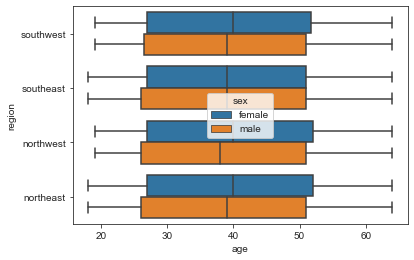

In [39]:
sns.boxplot( 'age', 'region', data=df, hue='sex')

In [40]:
ax = sns.barplot(x='charges', y='region', data=non_smokers,hue='sex', ci=False)

In [194]:
# charges for non_smokers no bi-modal like for smokers
x = non_smokers['charges'].values
sns.distplot(x)

In [195]:
# charges for non_smokers does not seem to be related to BMI
sns.boxplot( 'bmi', 'charges', data=non_smokers, hue='sex')

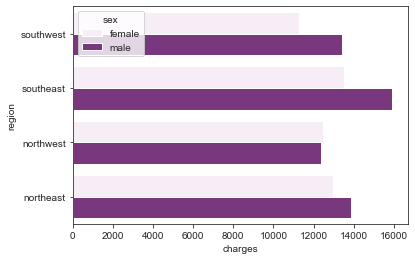

In [41]:
sns.set_style('ticks')
ax = sns.barplot(x = 'charges', y = 'region', hue = 'sex', color = '#832D88', data = df, orient = 'h', ci = False)

In [191]:
sns.set_style('ticks')
ax = sns.barplot(x = 'charges', y = 'region', hue = 'smoker', palette = ['#A2BFDB','#4E164B'], data = df, orient = 'h', ci = False)

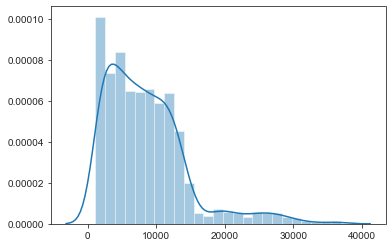

In [43]:
cns = non_smokers['charges'].values
sns.distplot(cns)

In [167]:
non_smokers.groupby(['sex','region']).agg(np.max)[['charges']].round(2)

charges
sex    region             
female northeast  31620.00
       northwest  33471.97
       southeast  36580.28
       southwest  36910.61
male   northeast  32108.66
       northwest  30284.64
       southeast  27724.29
       southwest  27941.29

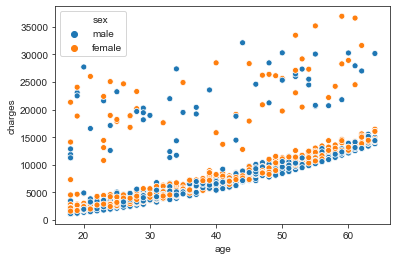

In [44]:
sns.color_palette("rocket")
ax =sns.scatterplot(x = 'age' , y = 'charges', data = non_smokers, hue = 'sex', sizes = (20, 200))

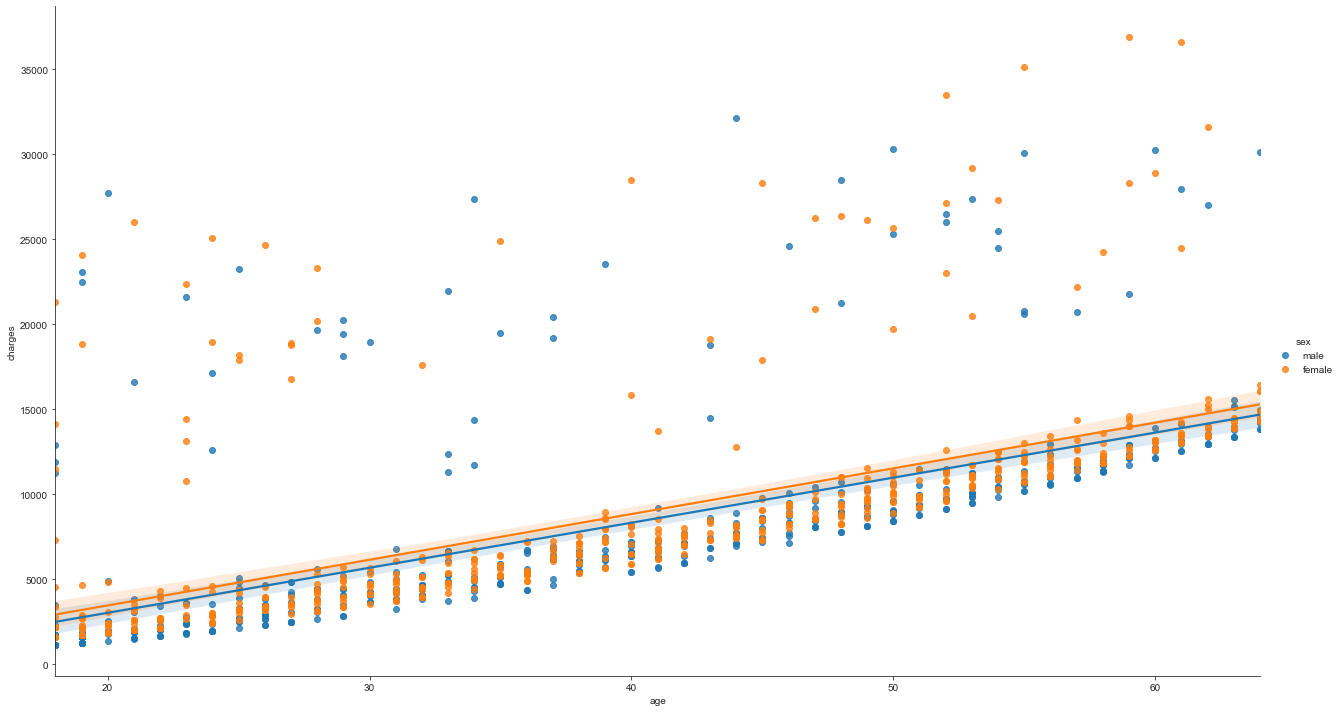

In [45]:
ax = sns.lmplot(x = "age", y = "charges", data = non_smokers, height = 10, aspect = 16/9, hue='sex')

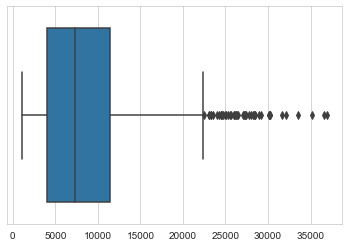

In [46]:
sns.set_style('whitegrid')
x = non_smokers['charges'].values
ax = sns.boxplot(x)

In [47]:
corr_non_smokers = non_smokers[['age', 'children', 'bmi','charges']].corr()
corr_non_smokers

age  children       bmi   charges
age       1.000000  0.033395  0.122635  0.627947
children  0.033395  1.000000  0.019212  0.138929
bmi       0.122635  0.019212  1.000000  0.084045
charges   0.627947  0.138929  0.084045  1.000000

In [48]:
mask_nsw = non_smokers['sex']=='female'

In [49]:
women_nonsmk = non_smokers[mask_nsw]
women_nonsmk

age     sex    bmi  children smoker     region      charges
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
7      37  female  27.74         3     no  northwest   7281.50560
9      60  female  25.84         0     no  northwest  28923.13692
13     56  female  39.82         0     no  southeast  11090.71780
...   ...     ...    ...       ...    ...        ...          ...
1331   23  female  33.40         0     no  southwest  10795.93733
1332   52  female  44.70         3     no  southwest  11411.68500
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[547 rows x 7 columns]

In [50]:
women_nonsmk.describe()

age         bmi    children      charges
count  547.000000  547.000000  547.000000    547.00000
mean    39.691042   30.540750    1.087751   8762.29730
std     14.025538    5.901675    1.204226   6060.77597
min     18.000000   16.820000    0.000000   1607.51010
25%     27.000000   26.360000    0.000000   4265.59910
50%     40.000000   30.210000    1.000000   7639.41745
75%     52.000000   34.310000    2.000000  11786.16660
max     64.000000   48.070000    5.000000  36910.60803

In [51]:
corr_women_nonsmk = women_nonsmk[['age', 'children', 'bmi','charges']].corr()
corr_women_nonsmk

age  children       bmi   charges
age       1.000000  0.079141  0.089148  0.621786
children  0.079141  1.000000  0.051114  0.176355
bmi       0.089148  0.051114  1.000000  0.075089
charges   0.621786  0.176355  0.075089  1.000000

In [52]:
hm_women_nonsmk = sns.heatmap(corr_women_nonsmk, annot = True, annot_kws = {'size':'20'},cmap = 'BuPu_r')

In [53]:
mask_nsm = non_smokers['sex']=='male'

In [54]:
men_nonsmk = non_smokers[mask_nsm]
men_nonsmk

age   sex    bmi  children smoker     region      charges
1      18  male  33.77         1     no  southeast   1725.55230
2      28  male  33.00         3     no  southeast   4449.46200
3      33  male  22.71         0     no  northwest  21984.47061
4      32  male  28.88         0     no  northwest   3866.85520
8      37  male  29.83         2     no  northeast   6406.41070
...   ...   ...    ...       ...    ...        ...          ...
1324   31  male  25.94         1     no  northwest   4239.89265
1325   61  male  33.54         0     no  northeast  13143.33665
1327   51  male  30.03         1     no  southeast   9377.90470
1329   52  male  38.60         2     no  southwest  10325.20600
1333   50  male  30.97         3     no  northwest  10600.54830

[517 rows x 7 columns]

In [55]:
men_nonsmk.describe()

age         bmi    children       charges
count  517.000000  517.000000  517.000000    517.000000
mean    39.061896   30.771799    1.092843   8087.204731
std     14.150768    6.192280    1.233844   5908.108989
min     18.000000   15.960000    0.000000   1121.873900
25%     26.000000   26.220000    0.000000   3659.346000
50%     39.000000   30.500000    1.000000   6985.506950
75%     51.000000   34.430000    2.000000  10959.330000
max     64.000000   53.130000    5.000000  32108.662820

In [56]:
corr_men_nonsmk = men_nonsmk[['age', 'children', 'bmi','charges']].corr()
corr_men_nonsmk

age  children       bmi   charges
age       1.000000 -0.013316  0.157116  0.634549
children -0.013316  1.000000 -0.012258  0.100066
bmi       0.157116 -0.012258  1.000000  0.095926
charges   0.634549  0.100066  0.095926  1.000000

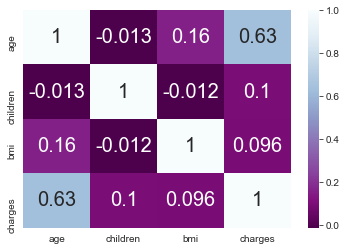

In [57]:
hm_men_nonsmk = sns.heatmap(corr_men_nonsmk, annot = True, annot_kws = {'size':'20'},cmap = 'BuPu_r')

In [58]:
mean=men_nonsmk['charges'].mean()
mean2=women_nonsmk['charges'].mean()
#print(f"min={np.min(r)}\n max={np.max(r)}\n median={np.median(r)}\n mean={np.mean(r)}\n std={np.std(r, ddof=1)}\n" )
plt.axvline(mean,0, 1, color = 'red')
plt.axvline(mean2,0, 1, color='blue')
ax = sns.distplot(x)

In [59]:
stats.ttest_ind( men_nonsmk['charges'], women_nonsmk['charges'], equal_var=False)

Ttest_indResult(statistic=-1.839622216350089, pvalue=0.06610296328675346)

In [60]:
non_smokers.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [61]:
# model non-smokers to perdict charges
formula = 'charges ~ age + I(age*2) + children + bmi + C(region)'

In [62]:
train, test = statsmodels_train_test_split(non_smokers)

In [63]:
model = smf.ols(formula = formula, data=non_smokers).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          1.48e-119
Time:                        13:26:37   Log-Likelihood:                -10479.
No. Observations:                1064   AIC:                         2.097e+04
Df Residuals:                    1057   BIC:                         2.101e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2450.0617    832.165     -2.944      0.003   -4082.945    -817.178
C(region)[T.northwest]  -552.2485    401.724     -1.375      0.170   -1340.515     236.018
C(region)[T.southeast]  -989.6312    412.349     -2.400      0.017   -1798.747    -180.516
C(region)[T.southwest] -1385.9236    402.721     -3.441      0.001   -2176.146    -595.701
age                       52.9895      2.023     26.200      0.000      49.021      56.958
I(age * 2)               105.9791      4.045     26.200      0.000      98.042     113.916
children                 586.9031    115.844      5.066      0.000     359.593     814.213
bmi                       17.9330     24.553      0.730      0.465     -30.246      66.112
==============================================================================
Omnibus:                      709.362   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5685.282
Skew:                           3.183   Prob(JB):                         0.00
Kurtosis:                      12.365   Cond. No.                     1.56e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
model.params

Intercept                -2450.061689
C(region)[T.northwest]    -552.248539
C(region)[T.southeast]    -989.631190
C(region)[T.southwest]   -1385.923585
age                         52.989550
I(age * 2)                 105.979100
children                   586.903078
bmi                         17.932971
dtype: float64

In [65]:
y_pred_test = model.predict(test)
y_pred_test

1127     7650.360826
323     13386.315162
498      9821.846875
837     12894.694662
902      6688.321134
            ...     
844     12139.124621
1013    10881.319762
870     10060.575723
748      9849.048959
283     13289.995841
Length: 266, dtype: float64

In [66]:
r2_score(test['charges'], y_pred_test)

0.4079537067657688

In [67]:
mean_squared_error(test['charges'], y_pred_test)

18541155.09152465

In [68]:
# model non-smokers

In [69]:
train2, test2 = statsmodels_train_test_split(non_smokers)

In [70]:
model2 = smf.ols(formula = 'age ~ charges + children + bmi + C(region)', data=non_smokers).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          5.90e-116
Time:                        13:26:37   Log-Likelihood:                -4046.3
No. Observations:                1064   AIC:                             8107.
Df Residuals:                    1057   BIC:                             8141.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21.6222      1.864     11.601      0.000      17.965      25.279
C(region)[T.northwest]     0.6054      0.952      0.636      0.525      -1.263       2.474
C(region)[T.southeast]     0.1355      0.979      0.138      0.890      -1.786       2.057
C(region)[T.southwest]     2.2038      0.957      2.304      0.021       0.327       4.081
charges                    0.0015   5.67e-05     26.200      0.000       0.001       0.002
children                  -0.6623      0.277     -2.392      0.017      -1.206      -0.119
bmi                        0.1700      0.058      2.935      0.003       0.056       0.284
==============================================================================
Omnibus:                      144.669   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.163
Skew:                          -0.933   Prob(JB):                     9.44e-49
Kurtosis:                       4.226   Cond. No.                     5.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model2.params

Intercept                 21.622204
C(region)[T.northwest]     0.605426
C(region)[T.southeast]     0.135458
C(region)[T.southwest]     2.203828
charges                    0.001486
children                  -0.662254
bmi                        0.170029
dtype: float64

In [72]:
y_pred_test2 = model2.predict(test2)
y_pred_test2

701     43.410193
622     40.430329
229     38.335594
107     31.915381
1158    30.478589
          ...    
325     36.567704
833     45.526704
1248    30.956314
510     43.899692
403     40.993474
Length: 266, dtype: float64

In [73]:
mean_squared_error(test2['charges'], y_pred_test2)

114119768.08377789

In [74]:
df2 = pd.read_csv('insurance.csv')

In [75]:
mask_nosmk = df2['smoker']=='no'

In [76]:
df2 = df2[mask_nosmk]

In [77]:
#version 3
def statsmodels_train_test_split2(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.Name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [78]:
# df2.head()

In [79]:
# # We need to use a package from sklearn
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder().fit_transform(df2['region'])
# le

In [80]:
# df2.loc[:,'region_code'] = le
# df2.head()

In [81]:
df3 = pd.read_csv('insurance.csv')

In [82]:
smk_mask = df3['smoker']=='no'

In [83]:
df3 = df3[smk_mask]

In [84]:
df3.head()

age     sex    bmi  children smoker     region      charges
1   18    male  33.77         1     no  southeast   1725.55230
2   28    male  33.00         3     no  southeast   4449.46200
3   33    male  22.71         0     no  northwest  21984.47061
4   32    male  28.88         0     no  northwest   3866.85520
5   31  female  25.74         0     no  southeast   3756.62160

In [85]:
df3_non_smokers = df3.drop(['smoker'], axis=1)

In [86]:
df3_non_smokers.head()

age     sex    bmi  children     region      charges
1   18    male  33.77         1  southeast   1725.55230
2   28    male  33.00         3  southeast   4449.46200
3   33    male  22.71         0  northwest  21984.47061
4   32    male  28.88         0  northwest   3866.85520
5   31  female  25.74         0  southeast   3756.62160

In [87]:
df3_non_smokers['region'].value_counts()

southeast    273
northwest    267
southwest    267
northeast    257
Name: region, dtype: int64

#MULTINOMIAL LOGISTIC REGRESSION USING SKLEARN

# TRY TO PREDICT REGION USING THE MULTINOMIAL LOGISTIC REGRESSION MODEL

In [89]:
df3_non_smokers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   region    1064 non-null   object 
 5   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 58.2+ KB


In [151]:
# this is equivalent to 
#formula = 'species ~ C(island) + bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g  + C(sex)'

y2, X2 = df3_non_smokers.region, df3_non_smokers.drop(columns='region')
X2 = pd.get_dummies(X2, drop_first=True)

In [152]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, random_state=42)

In [153]:
log_model = LogisticRegression(random_state=42, n_jobs=-1).fit(X2_train, y2_train)

In [164]:
#log_model.summary2()

In [162]:
log_model.score(X2,y2)

0.29605263157894735

In [154]:

y2_pred_test = log_model.predict(X2_test)
y2_pred_test

array(['southwest', 'southwest', 'northeast', 'northeast', 'southeast',
       'southeast', 'southwest', 'southwest', 'southeast', 'southwest',
       'northeast', 'northeast', 'southeast', 'southeast', 'southeast',
       'northeast', 'southeast', 'northeast', 'southeast', 'southeast',
       'southeast', 'northeast', 'northeast', 'northeast', 'southeast',
       'southwest', 'southeast', 'southwest', 'southwest', 'southeast',
       'southeast', 'northeast', 'northeast', 'southwest', 'southwest',
       'southeast', 'southeast', 'southeast', 'southeast', 'southeast',
       'southeast', 'southwest', 'southeast', 'southeast', 'southeast',
       'southwest', 'southwest', 'southeast', 'northeast', 'northeast',
       'southwest', 'southeast', 'southeast', 'southwest', 'southeast',
       'southwest', 'northeast', 'southwest', 'southwest', 'southwest',
       'southwest', 'southwest', 'northeast', 'northeast', 'southwest',
       'southeast', 'southwest', 'southeast', 'southwest', 'nort

In [155]:
confusion_matrix(y2_test, y2_pred_test)

array([[16,  0, 34, 14],
       [16,  0, 34, 17],
       [13,  0, 39, 16],
       [14,  1, 30, 22]])

In [156]:
log_model.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [157]:
log_model.intercept_

array([ 2.29415549e-04,  6.24800587e-04, -8.40682557e-04, -1.35335793e-05])

In [96]:
#Models with outliers removed for (non-smokers)

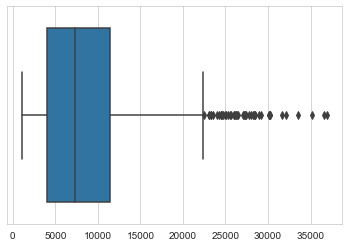

In [97]:
# use the boxplot to determine cutoff of 22,500 for charges
sns.set_style('whitegrid')
x = non_smokers['charges'].values
ax = sns.boxplot(x)

In [98]:
non_smokers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 106.5+ KB


In [99]:
non_smokers['smoker'].value_counts()

no    1064
Name: smoker, dtype: int64

In [100]:
# IS IT NECESSARY TO ELIMINATE THE OUTLIERS IN THE NON-SMOKERS OR CAN THEY BE EXPLAINED

In [179]:
mask_out_upper = non_smokers['charges']>22500

In [180]:
bmi_test = non_smokers[mask_out_upper]

In [181]:
# TRYING TO LOOK AT THE NON-SMOKER OUTLIERS TO SEE IF I CAN EXPLAIN THEM. I CAN'T
bmi_test

age     sex    bmi  children smoker     region      charges
9      60  female  25.84         0     no  northwest  28923.13692
62     64    male  24.70         1     no  northwest  30166.61817
115    60    male  28.60         0     no  northeast  30259.99556
138    54  female  31.90         3     no  southeast  27322.73386
140    34    male  22.42         2     no  northeast  27375.90478
219    24  female  23.21         0     no  southeast  25081.76784
227    58  female  41.91         0     no  southeast  24227.33724
242    55  female  26.80         1     no  southwest  35160.13457
245    54    male  30.02         0     no  northwest  24476.47851
289    52    male  26.40         3     no  southeast  25992.82104
321    26  female  29.64         4     no  northeast  24671.66334
355    46    male  27.60         0     no  southwest  24603.04837
379    62    male  31.46         1     no  southeast  27000.98473
387    50    male  25.37         2     no  northwest  30284.64294
430    19    male  33.10         0     no  southwest  23082.95533
443    59  female  36.52         1     no  southeast  28287.89766
468    28  female  24.32         1     no  northeast  23288.92840
491    61  female  25.08         0     no  southeast  24513.09126
516    20    male  35.31         1     no  southeast  27724.28875
520    50  female  27.36         0     no  northeast  25656.57526
526    19  female  30.59         2     no  northwest  24059.68019
539    53    male  31.35         0     no  southeast  27346.04207
573    62  female  36.86         1     no  northeast  31620.00106
599    52  female  37.53         2     no  northwest  33471.97189
637    35  female  38.10         2     no  northeast  24915.04626
658    48  female  35.91         1     no  northeast  26392.26029
688    47  female  24.10         1     no  southwest  26236.57997
696    53  female  32.30         2     no  northeast  29186.48236
770    61    male  36.10         3     no  southwest  27941.28758
806    40  female  41.42         1     no  northwest  28476.73499
876    49  female  27.10         1     no  southwest  26140.36030
925    50    male  32.11         2     no  northeast  25333.33284
936    44    male  29.74         2     no  northeast  32108.66282
959    48    male  36.67         1     no  northwest  28468.91901
964    52    male  36.77         2     no  northwest  26467.09737
980    54    male  25.46         1     no  northeast  25517.11363
987    45  female  27.65         1     no  northwest  28340.18885
1008   25    male  24.99         2     no  northeast  23241.47453
1012   61  female  33.33         4     no  southeast  36580.28216
1019   21  female  32.68         2     no  northwest  26018.95052
1098   52  female  30.88         0     no  northeast  23045.56616
1142   52  female  24.86         0     no  southeast  27117.99378
1206   59  female  34.80         2     no  southwest  36910.60803
1211   39    male  34.10         2     no  southeast  23563.01618
1258   55    male  37.72         3     no  northwest  30063.58055

In [182]:
bmi_test.describe()

age        bmi   children       charges
count  45.000000  45.000000  45.000000     45.000000
mean   46.933333  30.904000   1.333333  27481.427509
std    13.320183   5.155773   1.107823   3450.578945
min    19.000000  22.420000   0.000000  23045.566160
25%    40.000000  26.400000   0.000000  24915.046260
50%    52.000000  30.880000   1.000000  27000.984730
75%    55.000000  35.310000   2.000000  28923.136920
max    64.000000  41.910000   4.000000  36910.608030

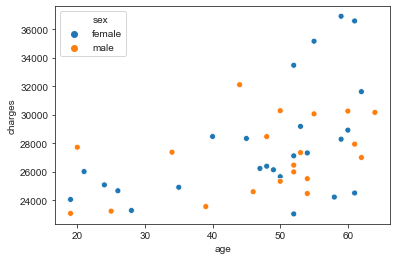

In [183]:
ax =sns.scatterplot(x = 'age' , y = 'charges', data = bmi_test, hue = 'sex', sizes = (50, 200))

In [184]:
corr_test = bmi_test[['age', 'children', 'bmi','charges']].corr()
corr_test

age  children       bmi   charges
age       1.000000 -0.084709  0.106006  0.474120
children -0.084709  1.000000  0.204047  0.290008
bmi       0.106006  0.204047  1.000000  0.171224
charges   0.474120  0.290008  0.171224  1.000000

In [185]:
mask_out = non_smokers['charges']<22500

In [186]:
bmi_test_lower = non_smokers[mask_out]

In [187]:
bmi_test_lower

age     sex    bmi  children smoker     region      charges
1      18    male  33.77         1     no  southeast   1725.55230
2      28    male  33.00         3     no  southeast   4449.46200
3      33    male  22.71         0     no  northwest  21984.47061
4      32    male  28.88         0     no  northwest   3866.85520
5      31  female  25.74         0     no  southeast   3756.62160
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1333   50    male  30.97         3     no  northwest  10600.54830
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[1019 rows x 7 columns]

In [188]:
bmi_test_lower.describe()

age          bmi    children       charges
count  1019.000000  1019.000000  1019.00000   1019.000000
mean     39.052012    30.641933     1.07949   7593.127803
std      14.028957     6.081014     1.22216   4500.396589
min      18.000000    15.960000     0.00000   1121.873900
25%      26.000000    26.320000     0.00000   3864.032425
50%      39.000000    30.310000     1.00000   7147.105000
75%      51.000000    34.400000     2.00000  10926.391100
max      64.000000    53.130000     5.00000  22493.659640

In [108]:
# since I don't have an explaination for the non-smoker outliers, look at the dataset without them
non_smokers_noout = non_smokers[mask_out]
non_smokers_noout

age     sex    bmi  children smoker     region      charges
1      18    male  33.77         1     no  southeast   1725.55230
2      28    male  33.00         3     no  southeast   4449.46200
3      33    male  22.71         0     no  northwest  21984.47061
4      32    male  28.88         0     no  northwest   3866.85520
5      31  female  25.74         0     no  southeast   3756.62160
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1333   50    male  30.97         3     no  northwest  10600.54830
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[1019 rows x 7 columns]

In [109]:
non_smokers_noout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1019 non-null   int64  
 1   sex       1019 non-null   object 
 2   bmi       1019 non-null   float64
 3   children  1019 non-null   int64  
 4   smoker    1019 non-null   object 
 5   region    1019 non-null   object 
 6   charges   1019 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 63.7+ KB


In [110]:
non_smokers_noout.describe()

age          bmi    children       charges
count  1019.000000  1019.000000  1019.00000   1019.000000
mean     39.052012    30.641933     1.07949   7593.127803
std      14.028957     6.081014     1.22216   4500.396589
min      18.000000    15.960000     0.00000   1121.873900
25%      26.000000    26.320000     0.00000   3864.032425
50%      39.000000    30.310000     1.00000   7147.105000
75%      51.000000    34.400000     2.00000  10926.391100
max      64.000000    53.130000     5.00000  22493.659640

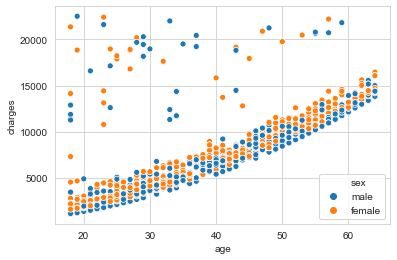

In [111]:
ax =sns.scatterplot(x = 'age' , y = 'charges', data = non_smokers_noout, hue = 'sex', sizes = (50, 200))

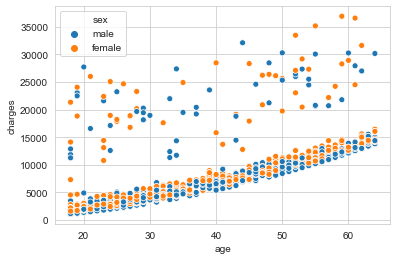

In [112]:
ax =sns.scatterplot(x = 'age' , y = 'charges', data = non_smokers, hue = 'sex', sizes = (50, 200))

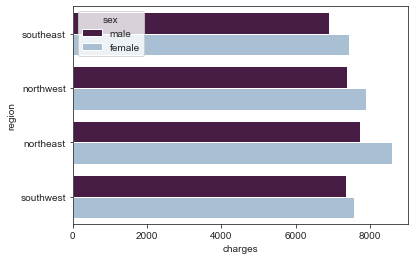

In [178]:
#order=non_smokers_noout.sort_values('region').charges ??
sns.set_style('ticks')
ax = sns.barplot(x = 'charges', y = 'region', hue = 'sex', palette = ['#4E164B','#A2BFDB'], data = non_smokers_noout, orient = 'h',ci = False)

In [114]:
non_smokers_noout.groupby(['sex','region']).agg(np.mean)[['charges']].round(2)

charges
sex    region            
female northeast  8578.71
       northwest  7883.37
       southeast  7424.68
       southwest  7566.13
male   northeast  7724.11
       northwest  7368.28
       southeast  6883.56
       southwest  7353.78

In [115]:
non_smokers_noout.groupby(['region','sex']).agg(np.median)[['charges']].round(2)

charges
region    sex            
northeast female  7986.15
          male    7448.40
northwest female  7443.64
          male    6456.85
southeast female  6407.00
          male    6289.75
southwest female  7337.75
          male    7160.09

In [116]:
#non_smokers_noout.groupby(['region','sex']).agg(np.sum)[['charges']].round(2)

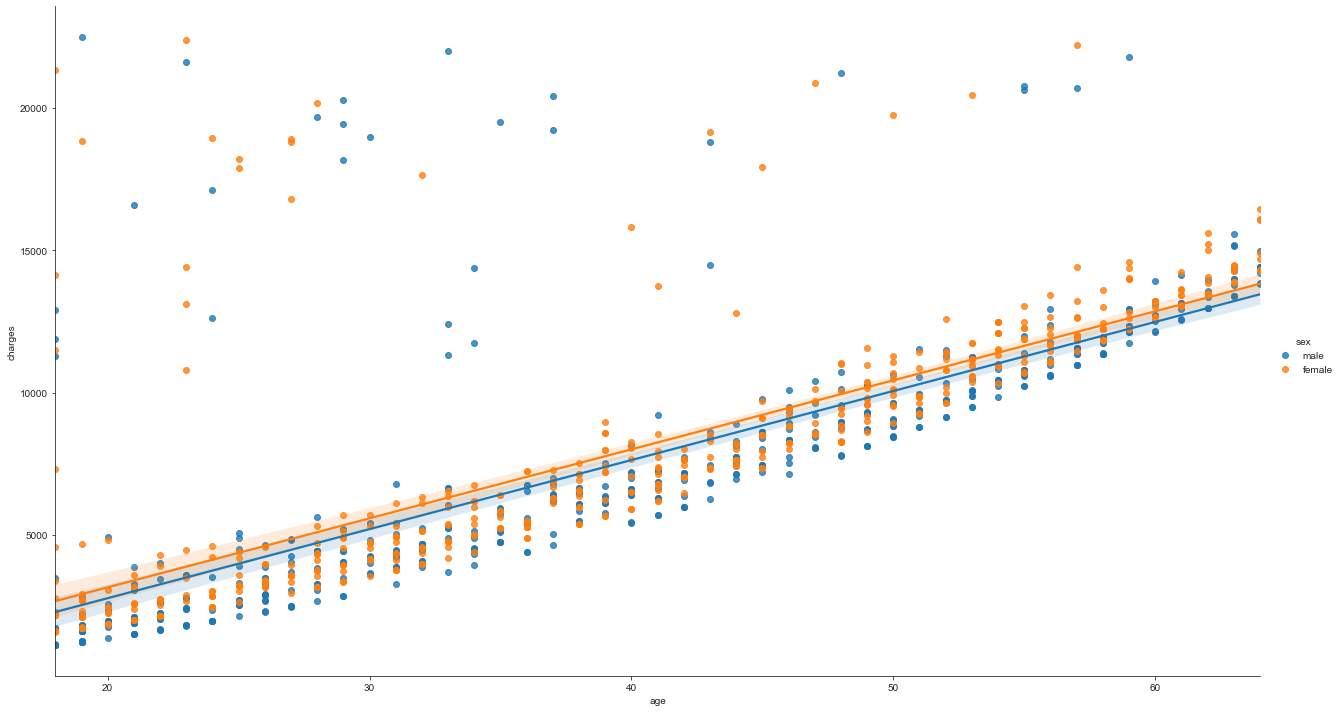

In [117]:
ax = sns.lmplot(x = "age", y = "charges", data = non_smokers_noout, height = 10, aspect = 16/9, hue='sex')

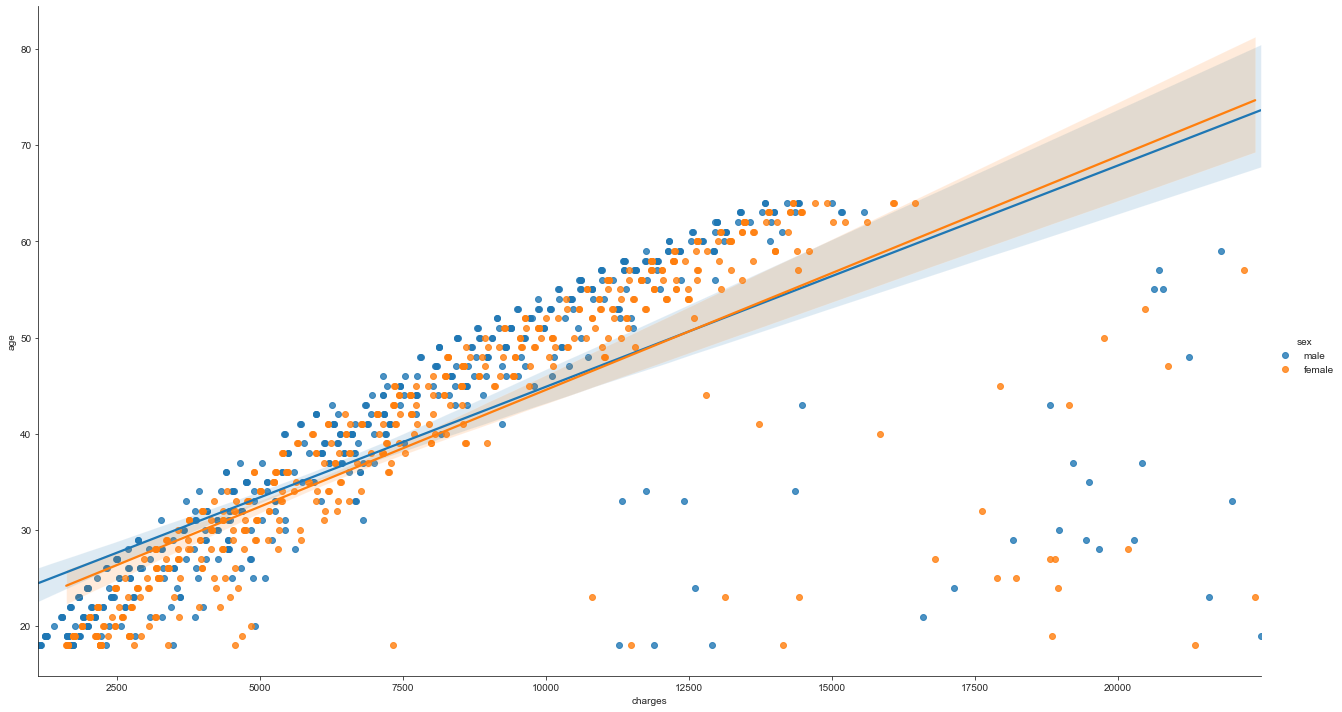

In [118]:
ax = sns.lmplot(x = "charges", y = "age", data = non_smokers_noout, height = 10, aspect = 16/9, hue='sex')

In [119]:
#ax = sns.barplot(x='charges', y='region', data=df,hue='sex', ci=False)

In [120]:
males = non_smokers_noout['sex']=='male'

In [121]:
df_males_ns = non_smokers_noout[males]

In [122]:
df_males_ns['charges'].mean()

7324.077628390342

In [123]:
females = non_smokers_noout['sex']=='female'

In [124]:
df_females_ns = non_smokers_noout[females]

In [125]:
df_females_ns['charges'].mean()

7849.292432354407

T-TEST SHOWS THAT THERE IS SOME STATISTICAL SIGNIFICANCE IN THE AVG CHARGES OF NON-SMOKING MEN AND WOMEN

In [126]:
mean=df_males_ns['charges'].mean()
mean2=df_females_ns['charges'].mean()
#print(f"min={np.min(r)}\n max={np.max(r)}\n median={np.median(r)}\n mean={np.mean(r)}\n std={np.std(r, ddof=1)}\n" )
plt.axvline(mean,0, 1, color = 'red')
plt.axvline(mean2,0, 1, color='blue')
ax = sns.distplot(x)

In [127]:
stats.ttest_ind( df_males_ns['charges'], df_females_ns['charges'], equal_var=False)

Ttest_indResult(statistic=-1.862722003959486, pvalue=0.06279166812515086)

In [128]:
non_smokers_noout.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [129]:
# model  non smoking women and men without outliers
#formula = 'charges ~ age + children + sex + bmi + C(region)'

In [130]:
train3, test3 = statsmodels_train_test_split(non_smokers_noout)

In [131]:
model3 = smf.ols(formula = 'charges ~ age + children + sex + bmi + C(region)', data=non_smokers_noout).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     212.4
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          1.38e-193
Time:                        13:26:44   Log-Likelihood:                -9556.4
No. Observations:                1019   AIC:                         1.913e+04
Df Residuals:                    1011   BIC:                         1.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2093.9175    536.399     -3.904      0.000   -3146.501   -1041.335
sex[T.male]             -389.9054    180.200     -2.164      0.031    -743.514     -36.297
C(region)[T.northwest]  -455.1241    257.689     -1.766      0.078    -960.790      50.542
C(region)[T.southeast]  -835.5853    264.924     -3.154      0.002   -1355.449    -315.722
C(region)[T.southwest]  -941.5011    257.197     -3.661      0.000   -1446.202    -436.801
age                      240.1511      6.492     36.990      0.000     227.411     252.891
children                 448.1114     73.765      6.075      0.000     303.361     592.862
bmi                       19.0340     15.649      1.216      0.224     -11.674      49.742
==============================================================================
Omnibus:                      895.273   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17267.638
Skew:                           4.218   Prob(JB):                         0.00
Kurtosis:                      21.317   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
y_pred_test3 = model.predict(test3)
y_pred_test3

1134     5022.719818
963     11942.981677
900     10936.228518
8        9061.751701
1242     4968.863104
            ...     
650     11481.932174
582      8881.770353
56      14661.520373
740     11077.501793
1187    14010.499700
Length: 255, dtype: float64

In [133]:
r2_score(test3['charges'], y_pred_test3)

0.6998178991151025

In [134]:
mean_squared_error(test3['charges'], y_pred_test3)

5901682.374363342

In [135]:
non_smokers_noout.head()

age     sex    bmi  children smoker     region      charges
1   18    male  33.77         1     no  southeast   1725.55230
2   28    male  33.00         3     no  southeast   4449.46200
3   33    male  22.71         0     no  northwest  21984.47061
4   32    male  28.88         0     no  northwest   3866.85520
5   31  female  25.74         0     no  southeast   3756.62160

In [136]:
# We need to use a package from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(non_smokers_noout['sex'])
le

array([1, 1, 1, ..., 0, 0, 0])

In [137]:
non_smokers_noout.loc[:,'sex_code2'] = le


/Users/galvanize/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/galvanize/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [138]:
# MALES ARE 1, FEMALES ARE 0
non_smokers_noout.head()

age     sex    bmi  children smoker     region      charges  sex_code2
1   18    male  33.77         1     no  southeast   1725.55230          1
2   28    male  33.00         3     no  southeast   4449.46200          1
3   33    male  22.71         0     no  northwest  21984.47061          1
4   32    male  28.88         0     no  northwest   3866.85520          1
5   31  female  25.74         0     no  southeast   3756.62160          0

In [139]:
train4, test4 = statsmodels_train_test_split(non_smokers_noout)

In [140]:
#formula = 'sex_code ~ C(region) + age + bmi + charges'

In [141]:
fitted_model = smf.logit(formula='sex_code2 ~ C(region) + age + bmi + charges', data=non_smokers_noout, missing='drop').fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.689892
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              sex_code2   No. Observations:                 1019
Model:                          Logit   Df Residuals:                     1012
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 Sep 2020   Pseudo R-squ.:                0.004264
Time:                        13:26:45   Log-Likelihood:                -703.00
converged:                       True   LL-Null:                       -706.01
Covariance Type:            nonrobust   LLR p-value:                    0.4209
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.2601      0.370     -0.702      0.483      -0.986       0.466
C(region)[T.northwest]    -0.0017      0.180     -0.009      0.993      -0.355       0.351
C(region)[T.southeast]    -0.0626      0.186     -0.337      0.736      -0.427       0.302
C(region)[T.southwest]    -0.1170      0.181     -0.648      0.517      -0.471       0.237
age                        0.0078      0.007      1.102      0.270      -0.006       0.022
bmi                        0.0100      0.011      0.914      0.361      -0.011       0.031
charges                -4.693e-05   2.25e-05     -2.088      0.037    -9.1e-05   -2.87e-06
==========================================================================================
"""

In [142]:
train5, test5 = statsmodels_train_test_split(non_smokers_noout)

In [143]:
# since age and charges are highly correlated, we don't need both. Removed region since it's values over .10
fitted_model5 = smf.logit(formula='sex_code2 ~ C(region) + age + charges', data=non_smokers_noout, missing='drop').fit()
fitted_model5.summary()

Optimization terminated successfully.
         Current function value: 0.690303
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              sex_code2   No. Observations:                 1019
Model:                          Logit   Df Residuals:                     1013
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 Sep 2020   Pseudo R-squ.:                0.003671
Time:                        13:26:45   Log-Likelihood:                -703.42
converged:                       True   LL-Null:                       -706.01
Covariance Type:            nonrobust   LLR p-value:                    0.3939
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0116      0.221      0.053      0.958      -0.422       0.445
C(region)[T.northwest]    -0.0032      0.180     -0.018      0.986      -0.356       0.350
C(region)[T.southeast]    -0.0188      0.180     -0.105      0.917      -0.371       0.333
C(region)[T.southwest]    -0.1043      0.180     -0.579      0.562      -0.457       0.249
age                        0.0082      0.007      1.157      0.247      -0.006       0.022
charges                 -4.61e-05   2.24e-05     -2.056      0.040   -9.01e-05   -2.14e-06
==========================================================================================
"""

In [144]:
fitted_model5.predict(test5)

1135    0.477009
127     0.472562
283     0.478916
1175    0.497159
329     0.478195
          ...   
391     0.516470
962     0.460789
822     0.516454
855     0.496269
264     0.373941
Length: 255, dtype: float64

In [145]:
y_pred_test5 = np.round(fitted_model.predict(test5))
y_pred_test5

1135    0.0
127     0.0
283     0.0
1175    0.0
329     0.0
       ... 
391     1.0
962     0.0
822     1.0
855     0.0
264     0.0
Length: 255, dtype: float64

In [146]:
non_smokers_noout.head()

age     sex    bmi  children smoker     region      charges  sex_code2
1   18    male  33.77         1     no  southeast   1725.55230          1
2   28    male  33.00         3     no  southeast   4449.46200          1
3   33    male  22.71         0     no  northwest  21984.47061          1
4   32    male  28.88         0     no  northwest   3866.85520          1
5   31  female  25.74         0     no  southeast   3756.62160          0

In [147]:
# SKLearn Confusion Matrix:
#the count of true negatives is C00 
#the count of false positives is C01
#the count of false negatives is C10
#the count of true positives is C11
# array([[TN, FP],
# [FN, TP]])
confusion_matrix(test5['sex_code2'], y_pred_test5)

array([[81, 43],
       [77, 54]])

In [148]:
# 135 right, 120 wrong only getting it right about 53% of the time 
# TP = 54
# TN = 81
# FP = 43
# FN = 77